<a href="https://colab.research.google.com/github/gcbirat12/Titanic_Survivor_Prediction/blob/main/Titanic_Survivor_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd #import pandas

In [4]:
from google.colab import drive # mount the data
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
train_data = pd.read_csv('/content/drive/MyDrive/titanic/train.csv') #read csv data

In [6]:
print(train_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [7]:
train_data = train_data.drop(columns='Name')

In [8]:
train_data = train_data.drop(columns='Cabin')

In [9]:
train_data = train_data.drop(columns='Fare')

In [10]:
def gender_to_number(Sex):
  if Sex == 'male':
    return 1
  if Sex == 'female':
    return 0
  else:
    return None


In [11]:
train_data['Sex'] = train_data['Sex'].apply(gender_to_number)

In [12]:
print(train_data.head())

   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch            Ticket  \
0            1         0       3    1  22.0      1      0         A/5 21171   
1            2         1       1    0  38.0      1      0          PC 17599   
2            3         1       3    0  26.0      0      0  STON/O2. 3101282   
3            4         1       1    0  35.0      1      0            113803   
4            5         0       3    1  35.0      0      0            373450   

  Embarked  
0        S  
1        C  
2        S  
3        S  
4        S  


In [13]:
train_data = train_data.drop(columns='Ticket')


In [14]:
def Embarked_to_Number(Embarked):
  if Embarked == 'S':
    return 1
  elif Embarked =='C':
    return 2
  elif Embarked =='Q':
    return 3
  else:
    return None

In [15]:
train_data['Embarked']= train_data['Embarked'].apply(Embarked_to_Number)

In [16]:
print(train_data.head())

   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch  Embarked
0            1         0       3    1  22.0      1      0       1.0
1            2         1       1    0  38.0      1      0       2.0
2            3         1       3    0  26.0      0      0       1.0
3            4         1       1    0  35.0      1      0       1.0
4            5         0       3    1  35.0      0      0       1.0


In [17]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Embarked     889 non-null    float64
dtypes: float64(2), int64(6)
memory usage: 55.8 KB
None


In [21]:
print(survival_counts)

0    549
1    342
Name: Survived, dtype: int64


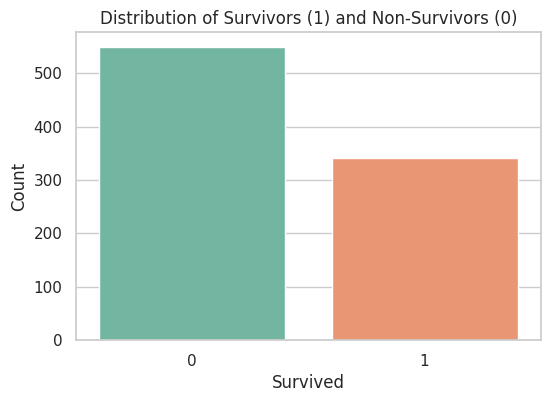

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
# Visualize the distribution of survivors and non-survivors

survival_counts = train_data['Survived'].value_counts()
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.barplot(x=survival_counts.index, y=survival_counts.values, palette="Set2")
plt.title("Distribution of Survivors (1) and Non-Survivors (0)")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

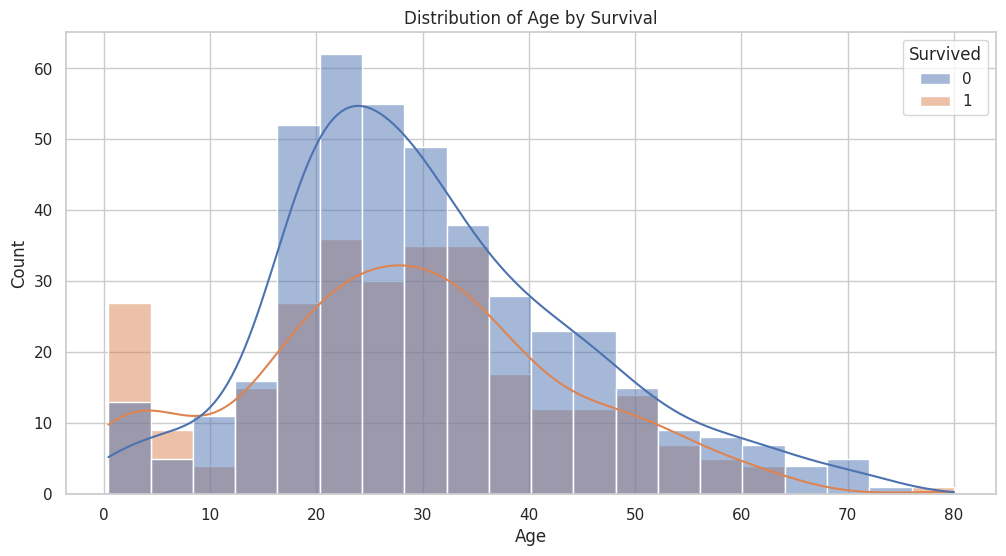

In [22]:
plt.figure(figsize=(12, 6))
sns.histplot(data=train_data, x='Age', hue='Survived', kde=True)
plt.title("Distribution of Age by Survival")
plt.show()


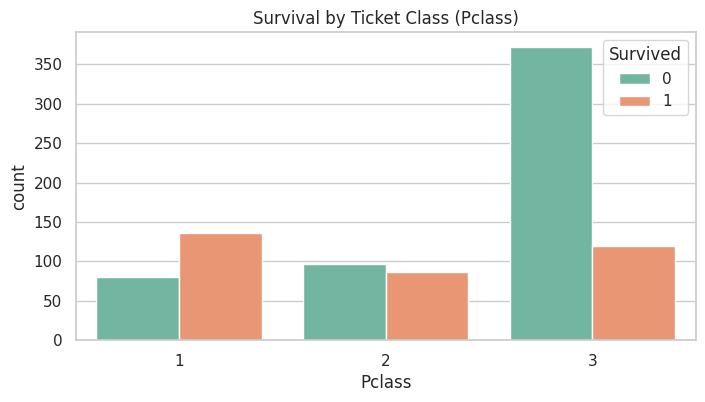

In [24]:
plt.figure(figsize=(8, 4))
sns.countplot(data=train_data, x='Pclass', hue='Survived', palette="Set2")
plt.title("Survival by Ticket Class (Pclass)")
plt.show()


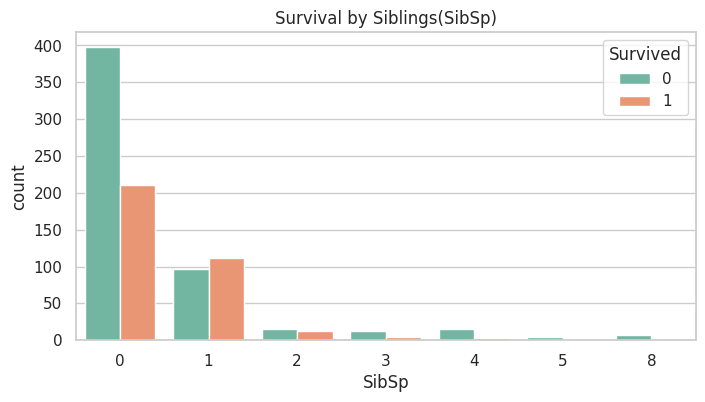

In [26]:
plt.figure(figsize=(8, 4))
sns.countplot(data=train_data, x='SibSp', hue='Survived', palette="Set2")
plt.title("Survival by Siblings(SibSp)")
plt.show()


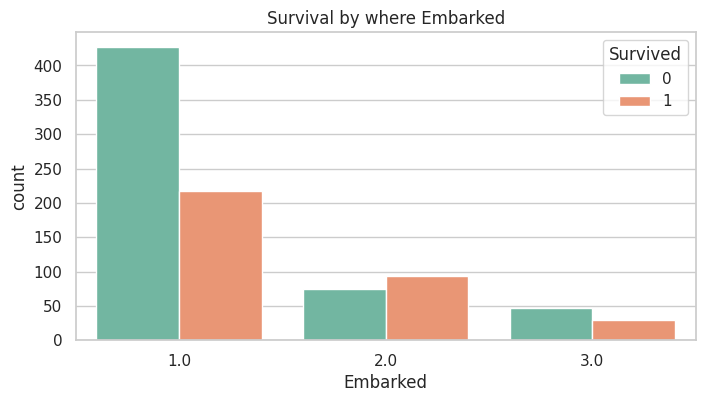

In [27]:
plt.figure(figsize=(8, 4))
sns.countplot(data=train_data, x='Embarked', hue='Survived', palette="Set2")
plt.title("Survival by where Embarked")
plt.show()


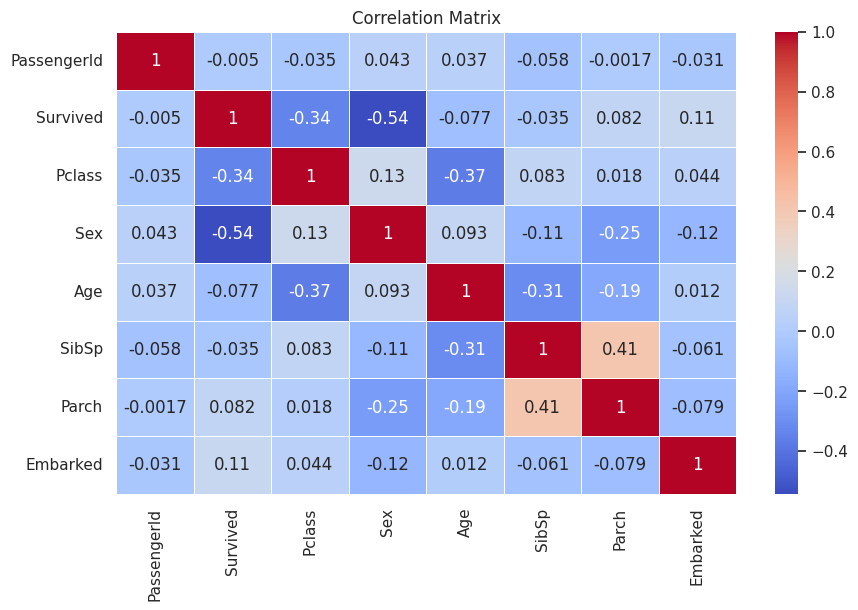

In [25]:
correlation_matrix = train_data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()
